# Example dag

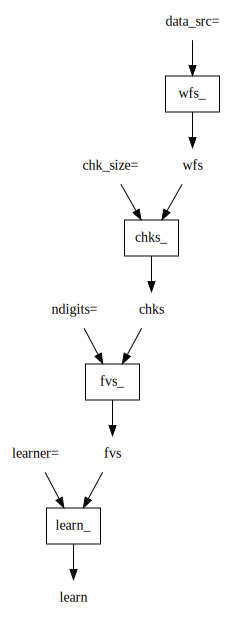

In [1]:
from meshed import DAG
from sklearn.preprocessing import MinMaxScaler

DFLT_CHK_SIZE = 4
DFLT_NDIGITS = None


def _chunker(wf, chk_size=DFLT_CHK_SIZE):
    """An iterable of fixed size chunks of wf"""
    yield from zip(*[iter(wf)] * chk_size)
    
def _featurizer(chk, ndigits=DFLT_NDIGITS):
    """Compute a feature vector from a waveform chunk"""
    from statistics import stdev
    # note: surrounding single number with [...] because a vector is expected
    return [round(stdev(map(float, chk)), ndigits)]  

def wfs(data_src=10):
    """Get an iterable of waveforms from the data source"""
    seed = [1, 2, 3, 5, 4, 2, 1, 4, 3]
    yield seed
    yield [x + 10 for x in seed] + [1, 2, 3, 7]
    # and finally, an outlier (the difference, is that we have high variance) 
    yield [x * data_src for x in seed]
    
def chks(wfs, chk_size=DFLT_CHK_SIZE):
    """apply _chunker to an iterable"""
    for wf in wfs:
        yield from _chunker(wf)

def fvs(chks, ndigits=DFLT_NDIGITS):
    """apply _featurizer to an iterable"""
    for chk in chks:
        yield _featurizer(chk)
        
# featurizer = partial(map, _featurizer)

from sklearn.preprocessing import MinMaxScaler

def learn(fvs, learner=MinMaxScaler()):
    """"""
    return learner.fit(list(fvs))



dag = DAG([wfs, chks, fvs, learn])
dag.dot_digraph()

In [2]:
from typing import Iterable

def is_subset(iterable1:Iterable, iterable2: Iterable):
    return all(item in iterable2 for item in iterable1)

In [5]:
is_subset((1,2),[1,2,3,4])

True